In [6]:
import numpy as np 
import scipy.optimize as optimize
import math 
import matplotlib.pyplot as plt     
from dotmap import DotMap
from legendre import legendre_polynomial,legendre_polynomial_dot, lagrange_polynomial, get_collocation
from utils import find_zeros,unique_with_tolerance, unpack_coefficients

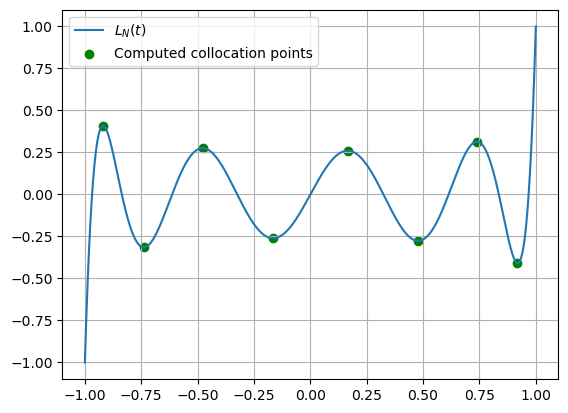

In [7]:
# Check correctness of legendre definitions
ps_N = 9
L_N = legendre_polynomial(ps_N=ps_N)
L_N_dot = legendre_polynomial_dot(ps_N=ps_N)


t_guess_array = np.linspace(start = -1,stop = 1, num= 5*ps_N, endpoint=False)
roots = unique_with_tolerance(find_zeros(L_N_dot,t_guess_array))

assert len(roots) == ps_N-1, f"Inconsistent size of collocation points {len(roots)} != {ps_N-1}"

fig = plt.figure()
ax = fig.add_subplot()
ax.plot(np.linspace(-1,1,num=1000), L_N(np.linspace(-1,1,num=1000)), label = "$L_N(t)$")
ax.scatter(roots, L_N(roots), label= "Computed collocation points", c = 'green')
ax.grid(visible=True)
ax.legend()


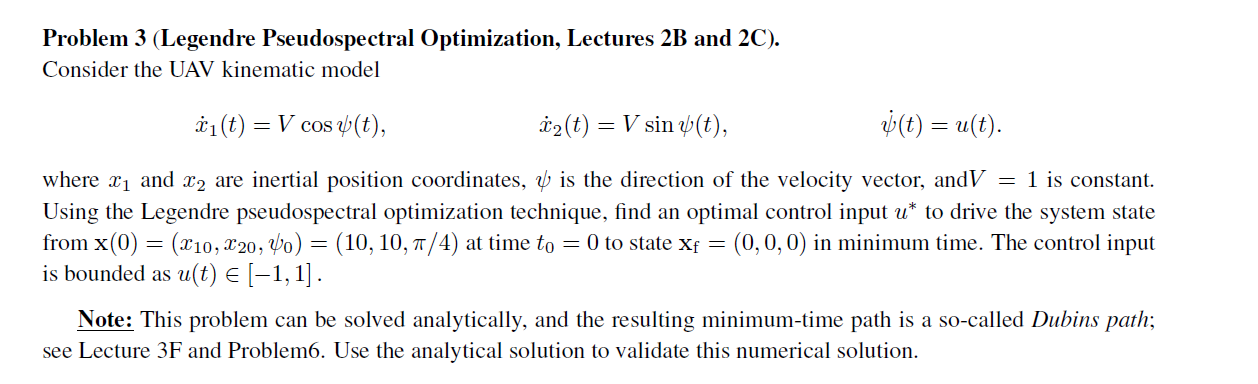

In [8]:
n_t_pts		= 10001;
# Choose order of Legendre polynomial
ps_N =9;	
LGL_colloc = get_collocation(ps_N=ps_N)
n_state	= 3 # Number of states
n_input	= 1 #Number of inputs
n_colloc	= ps_N + 1 # Number of collocation points
is_tf_free = 1
# Add 1 to number of decision variables if the final time tf is also to be optimized
n_decision_var	= (n_state + n_input)*(ps_N + 1) + is_tf_free #Total number of decision variables
V = 1 # m/s
x_init	= np.array([10,10,math.pi/4]);
x_term	=np.array([0,0,0])




q_initial_guess= np.concatenate([np.ones(n_colloc*n_state),np.zeros(n_colloc*n_input)])

a,b = unpack_coefficients(q_initial_guess, n_state,n_input, n_colloc)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


c:\Users\tagren\OneDrive - NASA\UAV_AIAA_COURSE\legendre.py:146: RuntimeWarning: invalid value encountered in divide
  ((t**2 - 1) * LN_dot(t)) / (t - tk[k])
c:\Users\tagren\OneDrive - NASA\UAV_AIAA_COURSE\legendre.py:146: RuntimeWarning: divide by zero encountered in divide
  ((t**2 - 1) * LN_dot(t)) / (t - tk[k])


The decision variable in the transcribed optimization problems is q = set of coefficients In normalized time, the i^th state $ x_i$  is
$x_i = \sum_{k=0}^{N} a_ki \phi_k$ and the i_th input is $u_i = \sum_{k=0}^{N} b_ki \phi_k$
We adopt the convention $q = (a_0, a_1, a_2, .. a_N, b_0, b_1, ... b_N)$  i.e., the vectors $a_k$ and $b_k$ stacked.


### Initial guess generation
There is no method of initial guess generation that works for all
systems. It is beneficial to find an initial guess that is feasible,
i.e., satisfies all constraints, or at least as many constraints as
possible. Here we set the states x_1 and x_2 to polynomial functions of
time and deduce the corresponding input u. This may not always be
possible to do, but it can be done for this particular system.


In [10]:

def system_dynamics_f(x_, u_):
	# Kinematics of Dubins problem 
	x_dot= np.array([V*np.cos(x_[2]),V*np.cos(x_[2]), u_]) 
	return x_dot
	

In [11]:

# CONSTRAINTS OF THE TRANSCRIBED PROBLEM
def calculate_constraints(q: np.ndarray, n_state,n_input, n_colloc ):
	a_, b_= unpack_coefficients(q, n_state,n_input,n_colloc)
	c_inequality= []
	c_equality	= []
	f_= np.zeros(( n_state, n_colloc) )
# 	for k = 1:n_colloc
# 			f_(:, k) = system_dynamics_f( a_(:, k), b_(:, k) );
# 		end
		
# 		for n = 1:n_state
# 			c_equality = [c_equality; ...
# 				LGL_colloc.D * (a_(n, :)') - 0.5*t_term*f_(n, :)'];		% Record the equality constraint residues
# 		end
		
# 		%-----	Equality constraints arising from boundary conditions
# % 		c_equality	= [c_equality; a_(:, 1) - x_init; a_(:, end) - x_term];
# 		c_equality	= [c_equality; a_(:, 1) - x_init];
		
# 	end
	return 

In [ ]:


# COST FUNCTION OF THE TRANSCRIBED PROBLEM
def calculate_cost(q: np.ndarray, n_colloc: int) -> float:
    # Unpack parameters for readibility
	[a_, b_]= unpack_coefficients(q)
	cost_J	= 0
	for k in range(n_colloc):
		w_k		= 2 / (ps_N*(ps_N + 1) * ( LGL_colloc.LN_tm(k) )^2)
		cost_J +=  0.5*t_term*w_k # l == 1 when we only minimize time 
	# 	end
	# end



IndentationError: unindent does not match any outer indentation level (<tokenize>, line 11)